# Genre identifier based on plot/description 
### An implementation of a genre identifier for Netflix titles based on their descriptions using combination of data preprocessing, exploratory data analysis, feature engineering, model training, and prediction 

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import joblib

In [2]:
# read dataset
data = pd.read_csv('dataset/netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
data.shape

(6234, 12)

In [4]:
# remove duplicates
data.drop_duplicates(inplace=True)

In [5]:
# remove other irrelevant columns 
to_drop = ['director', 'cast', 'country', 'type', 'date_added','release_year', 'duration', 'rating']

data= data.drop(to_drop, axis=1)

In [6]:
# splits the listed_in column with multiple genres seperated by comma into seperate columns
data["listed_in"]=data["listed_in"].str.split(",")
data = data.explode("listed_in").reset_index(drop=True)
#data.to_csv(r"dataset/netflix_titles.csv")

In [7]:
data.sample(5)

,show_id,title,listed_in,description
11826,70045274,Evan Almighty,Children & Family Movies,God summons narcissistic Evan to build an ark ...
13432,80100929,Cable Girls,Romantic TV Shows,"In 1920s Madrid, four women at the National Te..."
6082,80221446,Mary Poppins Returns,Music & Musicals,"In 1930s London, Michael Banks and his three c..."
7640,60000407,American Beauty,Dramas,While struggling to endure his tightly wound w...
9291,81217438,Union Leader,International Movies,Toxic conditions and a corrupt union leader pr...


In [8]:
#converts listed_in column in lowercase
data['listed_in'] = data['listed_in'].str.lower()
data['listed_in'] 

0        children & family movies
1                        comedies
2                 stand-up comedy
3                        kids' tv
4                        kids' tv
                   ...           
13665            british tv shows
13666                 tv comedies
13667                   tv dramas
13668           classic & cult tv
13669                 tv comedies
Name: listed_in, Length: 13670, dtype: object

In [9]:
#drops remining duplicates
data.drop_duplicates(inplace=True)

In [10]:
df_listedin = data.pivot_table(index = ['listed_in'], aggfunc ='size')
df_listedin = data['listed_in'].value_counts()
print(df_listedin)

listed_in
 international movies        1842
dramas                       1077
comedies                      803
documentaries                 644
action & adventure            597
                             ... 
 classic & cult tv              5
romantic movies                 2
spanish-language tv shows       1
sports movies                   1
tv sci-fi & fantasy             1
Name: count, Length: 72, dtype: int64


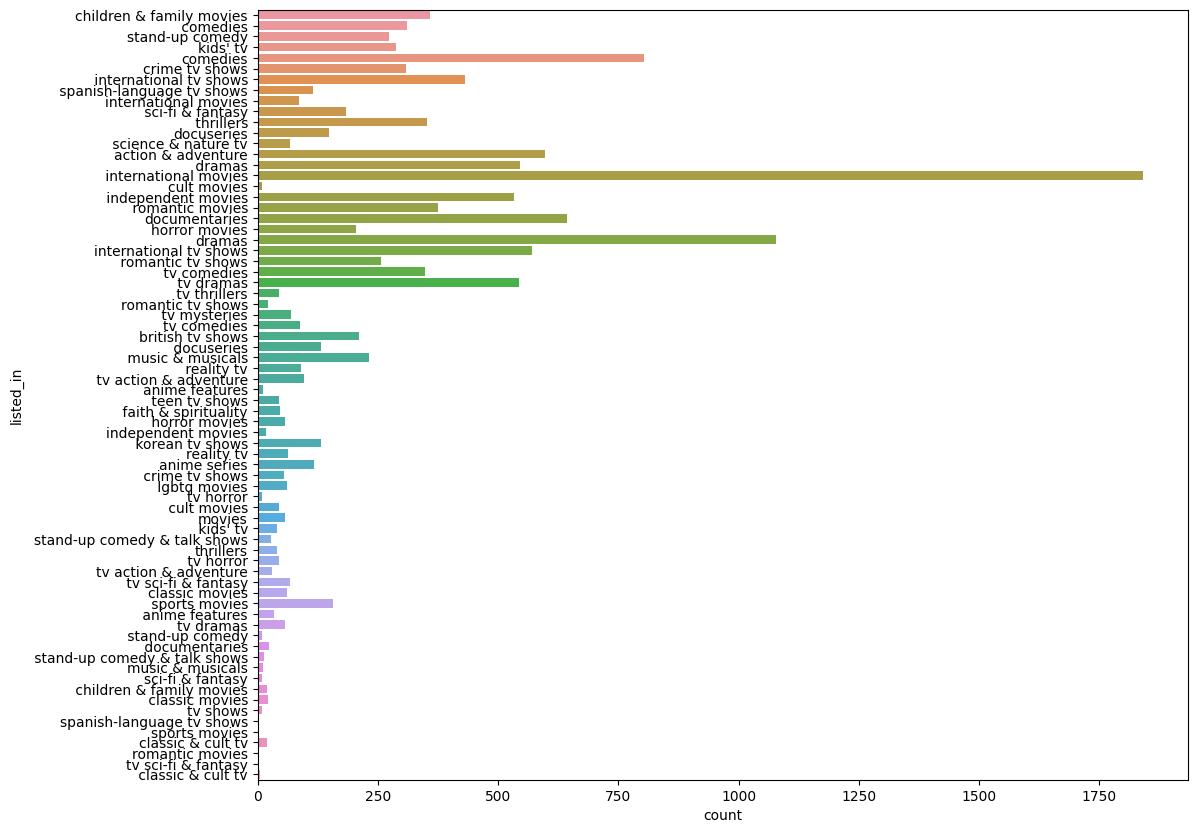

In [11]:
plt.figure(figsize=(12,10))
sns.countplot(y='listed_in', data=data)
plt.show()

In [12]:
data['listed_in'] = data['listed_in'].str.strip()
# Mapping dictionary for combining categories
category_mapping = {
    'anime features':'anime',
    'anime series':'anime',
    'tv comedies': 'comedies',
    'tv dramas': 'dramas',
    'tv action & adventure': 'action & adventure',
    'tv horror':'horror',
    'tv sci-fi & fantasy':'sci-fi & fantasy',
    'crime tv shows':'crime',
    'international tv shows':'international',
    'international tv':'international',
    'international movies':'international',
    'sports movies':'sports',
    'science and nature tv':'science and nature',
    'stand-up comedy':'stand-up and talk shows',
    'romantic tv shows':'romance',
    'horror movies':'horror',
    'docuseries':'docuseries and documentries',
    'documentaries' : 'docuseries and documentries',
    'tv thrillers':'thrillers',
    'romantic movies':'romance',
    'stand-up comedy & talk shows': 'stand-up & talk shows'

}
# Combine categories based on the mapping
data['listed_in'] = data['listed_in'].replace(category_mapping)
#removes rows with tv shows and movies
data = data[~data['listed_in'].isin(['tv shows', 'movies'])]

# Display the count of genres/categories in alphabetical order
df_listedin = data['listed_in'].value_counts().sort_index()
print(df_listedin)


listed_in
action & adventure              723
anime                           162
british tv shows                210
children & family movies        378
classic & cult tv                24
classic movies                   84
comedies                       1549
crime                           363
cult movies                      55
docuseries and documentries     947
dramas                         2222
faith & spirituality             47
horror                          316
independent movies              552
international                  2928
kids' tv                        328
korean tv shows                 132
lgbtq movies                     60
music & musicals                243
reality tv                      153
romance                         654
sci-fi & fantasy                261
science & nature tv              67
spanish-language tv shows       117
sports                          157
stand-up & talk shows            42
stand-up and talk shows         281
teen tv shows     

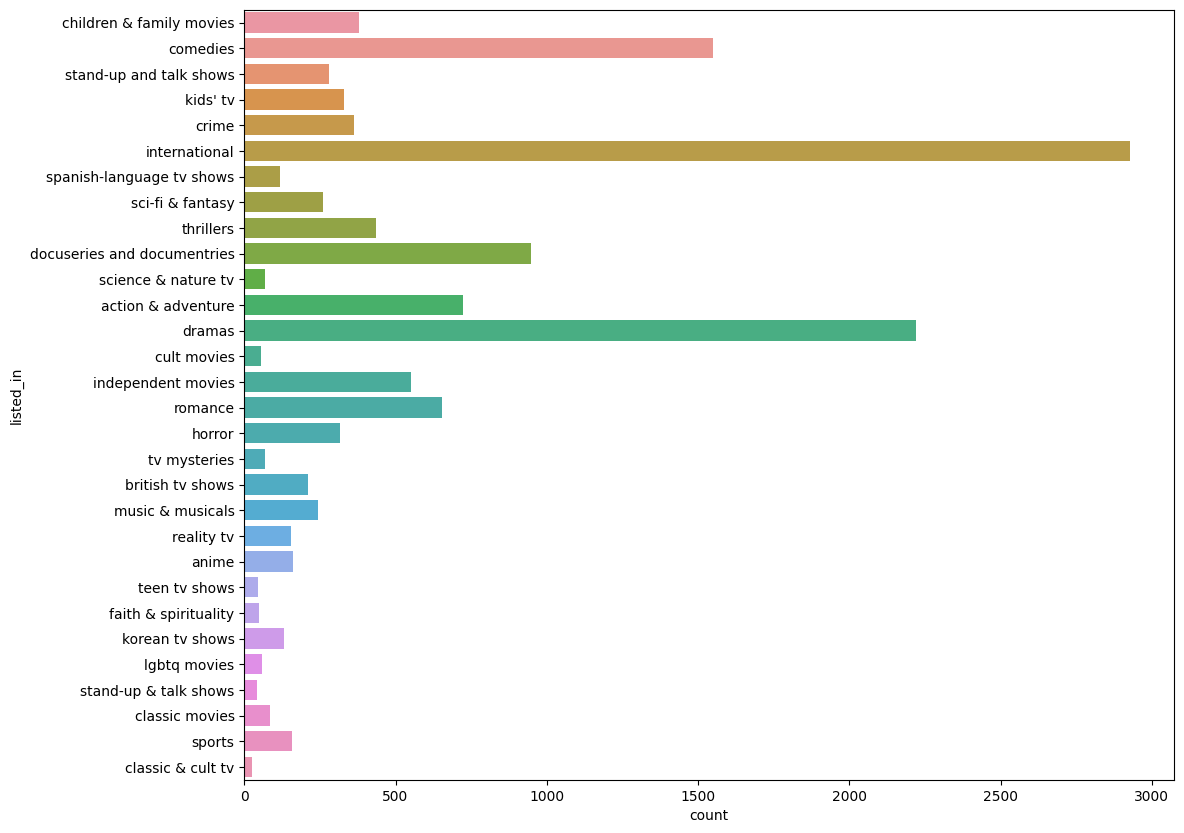

In [13]:
plt.figure(figsize=(12,10))
sns.countplot(y='listed_in', data=data)
plt.show()

In [14]:
#counts occurences of each title
df_title = data['title'].value_counts().sort_index()
print(df_title)

title
#Roxy                  2
#Rucker50              2
#Selfie                3
#Selfie 69             3
#realityhigh           1
                      ..
忍者ハットリくん               2
海的儿子                   2
마녀사냥                   3
반드시 잡는다                3
최강전사 미니특공대 : 영웅의 탄생    1
Name: count, Length: 6109, dtype: int64


In [15]:
#sets description column as input and listed_in as target variable
X=data['description']
y=data['listed_in']

In [16]:
np.unique(y, return_counts=True)

(array(['action & adventure', 'anime', 'british tv shows',
        'children & family movies', 'classic & cult tv', 'classic movies',
        'comedies', 'crime', 'cult movies', 'docuseries and documentries',
        'dramas', 'faith & spirituality', 'horror', 'independent movies',
        'international', "kids' tv", 'korean tv shows', 'lgbtq movies',
        'music & musicals', 'reality tv', 'romance', 'sci-fi & fantasy',
        'science & nature tv', 'spanish-language tv shows', 'sports',
        'stand-up & talk shows', 'stand-up and talk shows',
        'teen tv shows', 'thrillers', 'tv mysteries'], dtype=object),
 array([ 723,  162,  210,  378,   24,   84, 1549,  363,   55,  947, 2222,
          47,  316,  552, 2928,  328,  132,   60,  243,  153,  654,  261,
          67,  117,  157,   42,  281,   44,  436,   69], dtype=int64))

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# convert multi label target variables into binary labels
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['listed_in'])

y = multilabel_binarizer.transform(data['listed_in'])

In [20]:
tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize,
                            stop_words='english', 
                            lowercase=True, 
                            ngram_range=(1,4))

In [38]:
# drop tfidf Vectorizer into pkl file
joblib.dump(filename='tfidf.pkl', value=tfidf)

['tfidf.pkl']

In [23]:
# transform input features using tfidfVectorizer 
X_tfidf = tfidf.fit_transform(X)

C:\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [24]:
X_tfidf.data

array([0.16015414, 0.16015414, 0.16015414, ..., 0.05248346, 0.01551313,
       0.02020299])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [26]:
# split data into trainning and testing sets
X_train, X_test, y_train, y_test = train_test_split( X_tfidf,y, test_size=0.3, random_state=777)

In [27]:
# initialize random forest classifier
model = RandomForestClassifier(n_jobs=-1)

In [28]:
# fits the model
model.fit(X_train, y_train)   

RandomForestClassifier(n_jobs=-1)

In [29]:
# predicts labels for the testing data
y_pred = model.predict(X_test)

In [30]:
# evaluate model's performance
Classification_report = classification_report(y_test, y_pred)
print(Classification_report)

              precision    recall  f1-score   support

           0       0.44      0.29      0.35      1448
           1       0.19      0.10      0.13       557
           2       0.00      0.00      0.00       115
           3       0.30      0.14      0.19       215
           4       0.69      0.79      0.74      2823
           5       0.00      0.00      0.00        72
           6       0.42      0.32      0.36      1607
           7       0.47      0.39      0.43      2109
           8       0.67      0.80      0.73      2836
           9       0.09      0.04      0.06       212
          10       0.00      0.00      0.00        41
          11       0.18      0.10      0.13       597
          12       0.70      0.81      0.75      2935
          13       0.36      0.15      0.21       254
          14       0.25      0.27      0.26      1440
          15       0.50      0.44      0.47      2164
          16       0.50      0.61      0.55      2192
          17       0.65    

In [31]:
tfidf.vocabulary_ 

{'planning': 177090,
 'awesome': 37747,
 'wedding': 247981,
 'grandfather': 111697,
 ',': 5214,
 'polar': 178213,
 'bear': 40283,
 'king': 136079,
 'stolen': 218269,
 'artifact': 34832,
 'evil': 89884,
 'archaeologist': 33750,
 '.': 20820,
 'planning awesome': 177091,
 'awesome wedding': 37752,
 'wedding grandfather': 248020,
 'grandfather ,': 111707,
 ', polar': 15622,
 'polar bear': 178214,
 'bear king': 40317,
 'king stolen': 136166,
 'stolen artifact': 218275,
 'artifact evil': 34833,
 'evil archaeologist': 89901,
 'archaeologist .': 33751,
 'planning awesome wedding': 177092,
 'awesome wedding grandfather': 37753,
 'wedding grandfather ,': 248021,
 'grandfather , polar': 111708,
 ', polar bear': 15623,
 'polar bear king': 178219,
 'bear king stolen': 40318,
 'king stolen artifact': 136167,
 'stolen artifact evil': 218276,
 'artifact evil archaeologist': 34834,
 'evil archaeologist .': 89902,
 'planning awesome wedding grandfather': 177093,
 'awesome wedding grandfather ,': 37754,


In [32]:
# Sample description
desc = """The Ramayana is an ancient Sanskrit epic which follows Prince Rama's quest to rescue his beloved wife Sita from the clutches of Ravana with the help of an army of monkeys. It is traditionally attributed to the authorship of the sage Valmiki and dated to around 500 BCE to 100 BCE."""

In [33]:
desc_count = tfidf.transform([desc, ])

In [34]:
model.predict(desc_count)

array([[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 0]])

In [35]:

    binary_vector = model.predict(desc_count)

    predefined_order = ['action & adventure', 'anime', 'british tv shows',
            'children & family movies', 'classic & cult tv', 'classic movies',
            'comedies', 'crime', 'cult movies', 'docuseries and documentries',
            'dramas', 'faith & spirituality', 'horror', 'independent movies',
            'international', "kids' tv", 'korean tv shows', 'lgbtq movies',
            'music & musicals', 'reality tv', 'romance', 'sci-fi & fantasy',
            'science & nature tv', 'spanish-language tv shows', 'sports',
            'stand-up & talk shows', 'stand-up and talk shows',
            'teen tv shows', 'thrillers', 'tv mysteries']

    genres_present = [genre for genre, is_present in zip(predefined_order, binary_vector[0]) if is_present == 1]

In [36]:
genres_present

['classic & cult tv',
 'crime',
 'cult movies',
 'horror',
 'korean tv shows',
 'lgbtq movies',
 'romance',
 'science & nature tv']

In [37]:
#dumps trainned model into pkl file
joblib.dump(filename='Genre_identifyer.pkl', value=model)

['Genre_identifyer.pkl']